In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, mean_squared_error
from sklearn.neural_network import MLPClassifier
import seaborn as sn

## Data

In [3]:
digits = load_digits()

There are 1797 images of digits in this dataset


<Figure size 432x288 with 0 Axes>

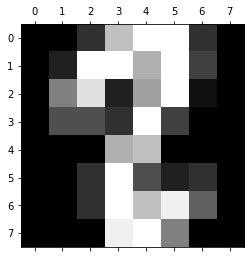

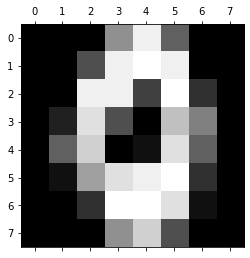

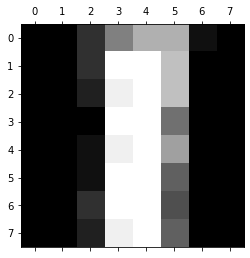

In [4]:
plt.gray()
for i in range(700,703):
    plt.matshow(digits.images[i])
print("There are {} images of digits in this dataset" .format(len(digits.images)))

In [5]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(df['target'], axis = 'columns'), digits.target, test_size = 0.2)
print("We will use {} rows to train the model and {} to test the model." .format(len(x_train), len(x_test)))

We will use 1437 rows to train the model and 360 to test the model.


## Prediction with random forest

### Training the model

In [7]:
model = RandomForestClassifier(n_estimators = 15)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15)

### Testing the model

In [8]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  1 36  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  1 32  0]
 [ 0  0  0  0  0  1  0  0  3 39]]


Text(69.0, 0.5, 'Truth')

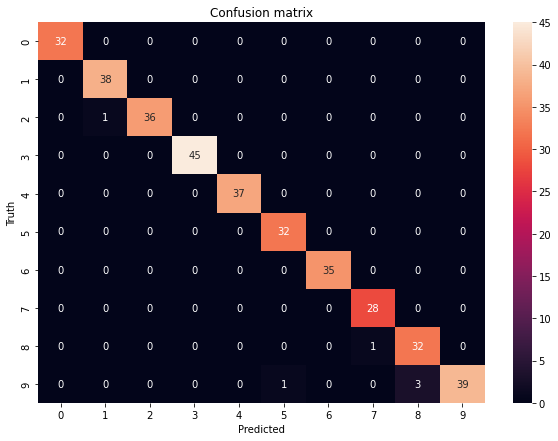

In [9]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [10]:
error_rate = zero_one_loss(y_test, y_predicted)
print("The error rate is {}" .format(error_rate))
MSE = mean_squared_error(y_test, y_predicted)
print("The mean squared error is {}" .format(MSE))

The error rate is 0.01666666666666672
The mean squared error is 0.058333333333333334


## Prediction with neural network

### Training model 

In [11]:
model = MLPClassifier(hidden_layer_sizes = 20, activation = "logistic", solver = "sgd", verbose = True)
model.fit(x_train, y_train)

Iteration 1, loss = 2.40067296
Iteration 2, loss = 2.37354875
Iteration 3, loss = 2.33850636
Iteration 4, loss = 2.30319088
Iteration 5, loss = 2.26982670
Iteration 6, loss = 2.23797357
Iteration 7, loss = 2.20905817
Iteration 8, loss = 2.18230938
Iteration 9, loss = 2.15800224
Iteration 10, loss = 2.13445522
Iteration 11, loss = 2.11183738
Iteration 12, loss = 2.09057028
Iteration 13, loss = 2.06985248
Iteration 14, loss = 2.05036271
Iteration 15, loss = 2.03163728
Iteration 16, loss = 2.01361863
Iteration 17, loss = 1.99604851
Iteration 18, loss = 1.97925878
Iteration 19, loss = 1.96331852
Iteration 20, loss = 1.94827342
Iteration 21, loss = 1.93358789
Iteration 22, loss = 1.91932724
Iteration 23, loss = 1.90511465
Iteration 24, loss = 1.89112913
Iteration 25, loss = 1.87745951
Iteration 26, loss = 1.86397081
Iteration 27, loss = 1.85064357
Iteration 28, loss = 1.83757351
Iteration 29, loss = 1.82467662
Iteration 30, loss = 1.81184704
Iteration 31, loss = 1.79916568
Iteration 32, los

/home/cytech/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=20, solver='sgd',
              verbose=True)

### Testing model

In [12]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  3  0  0  1  0  0  1]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  1 42  0  0  0  1  1  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  1  0  0  0 31  0  0  0  0]
 [ 0  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  2  0 25  0  1]
 [ 0  1  0  0  0  0  0  2 29  1]
 [ 0  0  0  2  0  2  0  0  5 34]]


Text(69.0, 0.5, 'Truth')

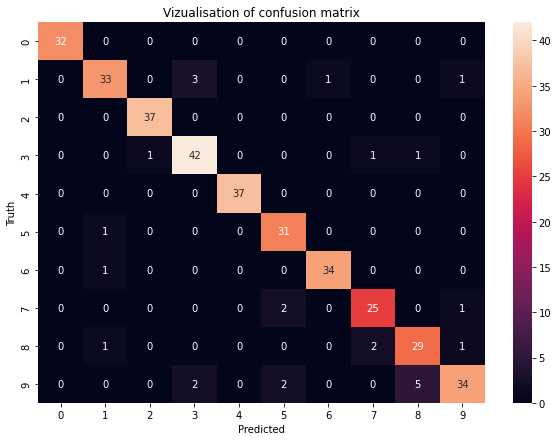

In [14]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.title("Vizualisation of confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
error_rate = zero_one_loss(y_test, y_predicted)
print("The error rate is {}" .format(error_rate))
MSE = mean_squared_error(y_test, y_predicted)
print("The mean squared error is {}" .format(MSE))

The error rate is 0.07222222222222219
The mean squared error is 0.9916666666666667
